In [20]:
import pandas as pd
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
df = pd.read_csv('dataset_37_diabetes.csv')

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [22]:
d = {'tested_negative': 0, 'tested_positive': 1, }

df['class'] = df['class'].map(d)

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


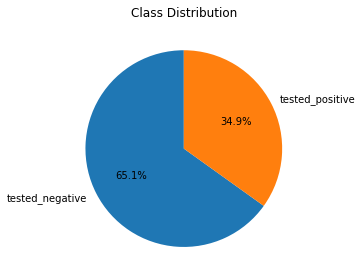

In [23]:
# Check  distribution of data
class_dist = df.groupby('class').size()
labels = 'tested_negative', 'tested_positive'
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

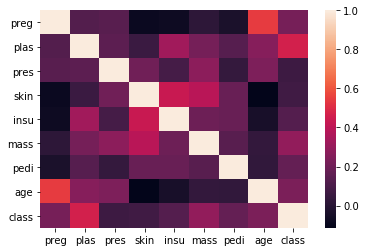

In [24]:
corr=df.corr()
sn.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [25]:
data = df.values[:, 0:8]
labels = df.values[:, 8]

In [26]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0, shuffle=True)
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [28]:
# generate a positive prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (classifier.score(X_test, y_test)*100))

precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       107
         1.0       0.79      0.57      0.67        47

    accuracy                           0.82       154
   macro avg       0.81      0.75      0.77       154
weighted avg       0.82      0.82      0.82       154

Test accuracy: 82.47%


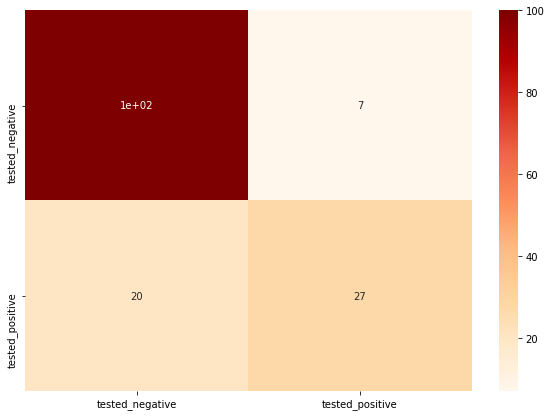

In [29]:
# Plot Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['tested_negative', 'tested_positive']],
              columns = [i for i in ['tested_negative', 'tested_positive']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")

Random Forest: ROC AUC=0.866


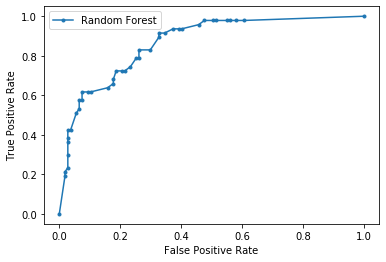

In [33]:
# Plot ROC Curve
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()